<a href="https://colab.research.google.com/github/pythonuzgit/elmurodov/blob/master/Natural%20Language%20Processing%20using%20Gensim/Twetter_sentiment_analysis_with_Gensim_using_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"uzazam","key":"7abb2778b77e603b3a87069f481fc6a6"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change the permission

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mayurdalvi/twitter-sentiments-analysis-nlp

  0% 0.00/1.23M [00:00<?, ?B/s]
100% 1.23M/1.23M [00:00<00:00, 41.0MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/twitter-sentiments-analysis-nlp.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import gensim
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords
from textblob import Word


Reading Data

In [ ]:
train_set = pd.read_csv('/content/Twitter Sentiments.csv')
train_set.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


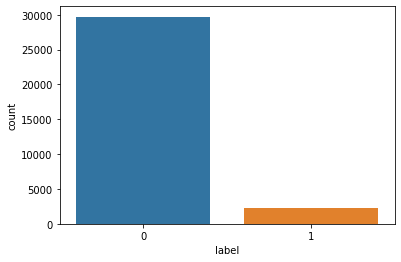

In [ ]:
sns.countplot(x = 'label', data = train_set)

In [ ]:
train_set.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

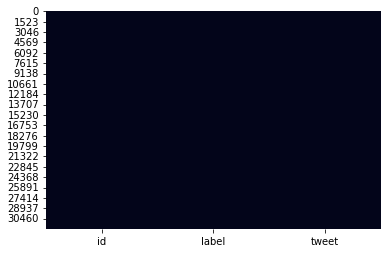

In [ ]:
sns.heatmap(train_set.isnull(), cbar = False)

In [ ]:
print(train_set.shape)

(31962, 3)


In [ ]:
set = pd.concat([train_set], axis = 0, ignore_index = True)
set

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
set.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

Data Pre-processing

In [ ]:
review_txt = set.tweet.apply(gensim.utils.simple_preprocess)
review_txt

0        [user, when, father, is, dysfunctional, and, i...
1        [user, user, thanks, for, lyft, credit, can, u...
2                                  [bihday, your, majesty]
3        [model, love, take, with, all, the, time, in, ...
4                   [factsguide, society, now, motivation]
                               ...                        
31957                        [ate, user, isz, that, youuu]
31958    [to, see, nina, turner, on, the, airwaves, try...
31959    [listening, to, sad, songs, on, monday, mornin...
31960    [user, sikh, temple, vandalised, in, in, calga...
31961                 [thank, you, user, for, you, follow]
Name: tweet, Length: 31962, dtype: object

In [ ]:
rev=[0]*31962
for i in range(0,31962):
    str=" "
    re=review_txt[i]
    rev[i]=str.join(re)

In [ ]:
cv1 = CountVectorizer()
gen = cv1.fit_transform(rev)
print(gen)

  (0, 35107)	1
  (0, 36397)	1
  (0, 11236)	1
  (0, 16883)	2
  (0, 9720)	1
  (0, 1157)	1
  (0, 30612)	1
  (0, 29317)	1
  (0, 14680)	1
  (0, 9412)	1
  (0, 15095)	2
  (0, 17985)	1
  (0, 16732)	1
  (0, 9719)	1
  (0, 28492)	1
  (1, 35107)	2
  (1, 33060)	1
  (1, 12117)	1
  (1, 19931)	1
  (1, 7420)	1
  (1, 5055)	1
  (1, 35098)	1
  (1, 5404)	1
  (1, 33330)	1
  (1, 9214)	1
  :	:
  (31958, 5937)	1
  (31959, 16883)	1
  (31959, 33712)	2
  (31959, 28613)	2
  (31959, 23811)	1
  (31959, 21545)	1
  (31959, 21689)	1
  (31959, 36932)	1
  (31959, 30803)	1
  (31959, 19198)	1
  (31959, 24162)	1
  (31960, 35107)	1
  (31960, 16197)	2
  (31960, 32901)	1
  (31960, 30008)	1
  (31960, 35222)	1
  (31960, 4959)	1
  (31960, 37104)	1
  (31960, 6809)	1
  (31960, 224)	1
  (31961, 35107)	1
  (31961, 12117)	1
  (31961, 37472)	2
  (31961, 33050)	1
  (31961, 12029)	1


In [ ]:

print(gen[1])

  (0, 35107)	2
  (0, 33060)	1
  (0, 12117)	1
  (0, 19931)	1
  (0, 7420)	1
  (0, 5055)	1
  (0, 35098)	1
  (0, 5404)	1
  (0, 33330)	1
  (0, 9214)	1
  (0, 23648)	1
  (0, 36392)	1
  (0, 35239)	1
  (0, 16197)	1
  (0, 24798)	1
  (0, 8850)	1
  (0, 13118)	1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(gen, set.label, train_size = 0.8)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
pre = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
predic = rf.predict(X_test)
print(accuracy_score(predic, y_test))

0.9540122008446739
